In [1]:
!pwd

/media/huyvt/DATA/adtech/OCR/Dataset_EDA/src


In [2]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os
import json
from math import sin, cos

In [3]:
data_image_path = '/media/huyvt/DATA/adtech/OCR/visa/dataset/visa_v2/train/images_Object'
data_label_path = '/media/huyvt/DATA/adtech/OCR/visa/dataset/visa_v2/train/labelme_OCR_Object'

In [4]:
filenames = os.listdir(data_image_path)

image_paths = []
label_paths = []
for filename in filenames:
    name, ext = os.path.splitext(filename)
    image_paths.append(os.path.join(data_image_path, filename))
    label_paths.append(os.path.join(data_label_path, name + '.json'))


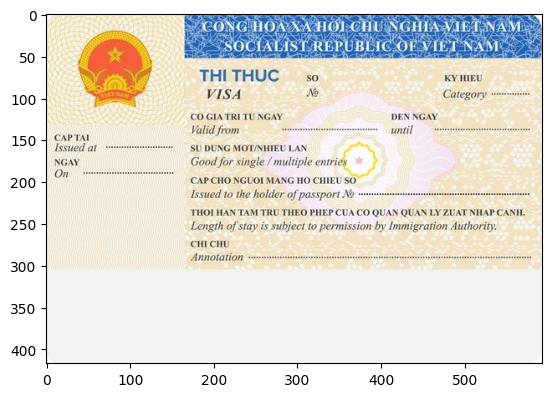

In [5]:
template = cv2.imread('/media/huyvt/DATA/adtech/OCR/visa/dataset/template.jpg')
template_rgb = template[:,:,::-1]
plt.imshow(template_rgb)

In [6]:
import sys
sys.path.append('../')
from vis import display, Colors
from utils import read_labelme_value, xyxy2xywh_norm

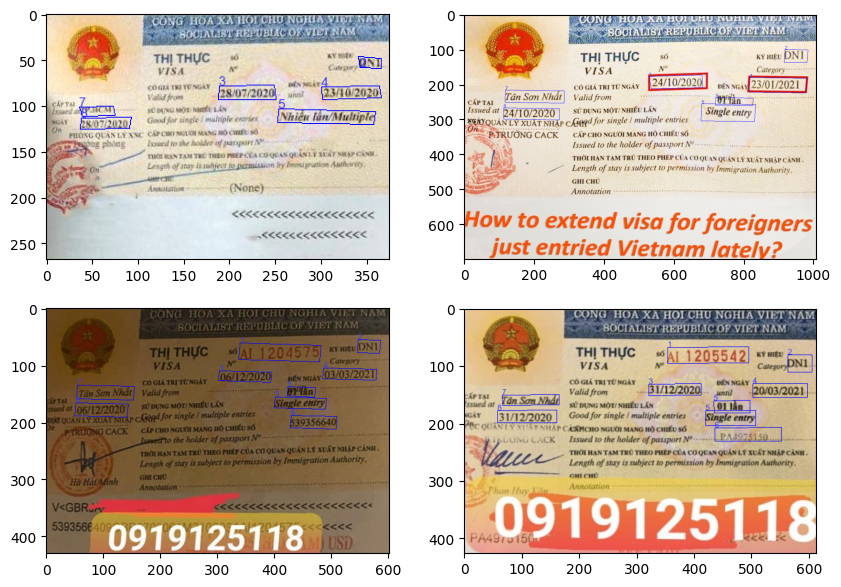

In [7]:
# visualize 4 examples
idl = [0,1,2,3]
plt.figure(figsize=[10, 7])
for i,id in enumerate(idl):
    image = cv2.imread(image_paths[i])
    bboxes, labels = read_labelme_value(label_paths[i])
    plt.subplot(2,2,i+1)
    image = display(image, bboxes, labels)
    plt.imshow(image[:,:,::-1])
plt.show()

Positions

In [8]:
def get_position():
    xs = {}
    ys = {}
    ws = {}
    hs = {}
    for (image_path, label_path) in zip(image_paths, label_paths):
        # print(image_path, label_path)
        image = cv2.imread(image_path)
        
        bboxes, labels = read_labelme_value(label_path)
        # print('label: ', labels)
        for (bbox, label) in zip(bboxes, labels):
            # if label == class_name:
            x,y,w,h = xyxy2xywh_norm([bbox[0][0], bbox[0][1], bbox[2][0], bbox[2][1]], image.shape[1], image.shape[0])
            if x > 1 or y > 1 or x < 0 or y < 0:
                # print(image_path, bbox, label, image.shape)
                continue
            if label not in xs:
                xs[label] = [x]
                ys[label] = [y]
                ws[label] = [w]
                hs[label] = [h]
            else:
                xs[label].append(x)
                ys[label].append(y)
                ws[label].append(w)
                hs[label].append(h)
                # print(image.shape, bbox)
    return xs, ys, ws, hs
    


In [9]:
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

In [10]:
list_xs, list_ys, list_ws, list_hs = get_position()
w = template_rgb.shape[1]
h = template_rgb.shape[0]

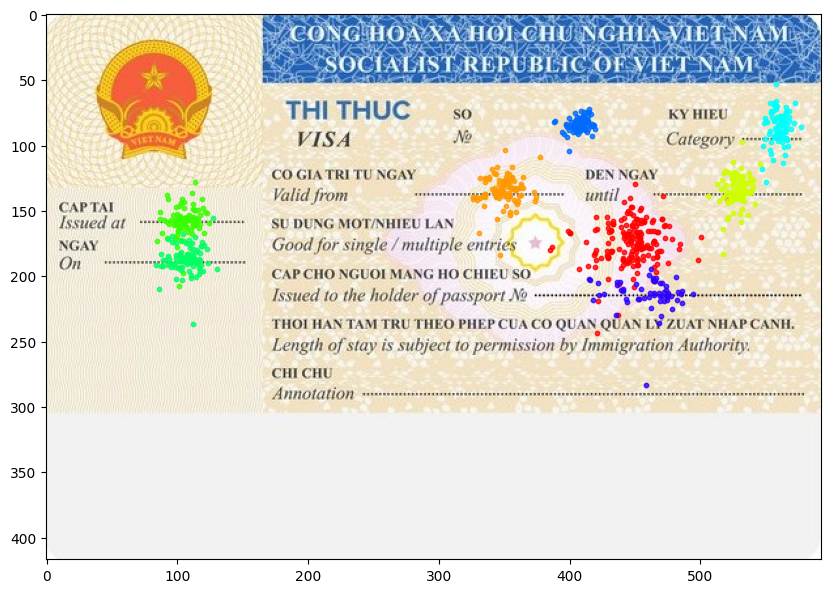

In [11]:
cmap = get_cmap(100)
plt.figure(figsize=(10,10))
for i, k in enumerate(list_xs):
    xs = np.array(list_xs[k])
    ys = np.array(list_ys[k])
    # print(xs.shape, ys.shape)
    xs = xs*w
    ys = ys*h
    # print(xs, ys)
    
    plt.imshow(template_rgb, alpha=0.8)
    plt.scatter(xs, ys, color=cmap(i*10), s=10, alpha=0.8);

Text(0, 0.5, 'Height')

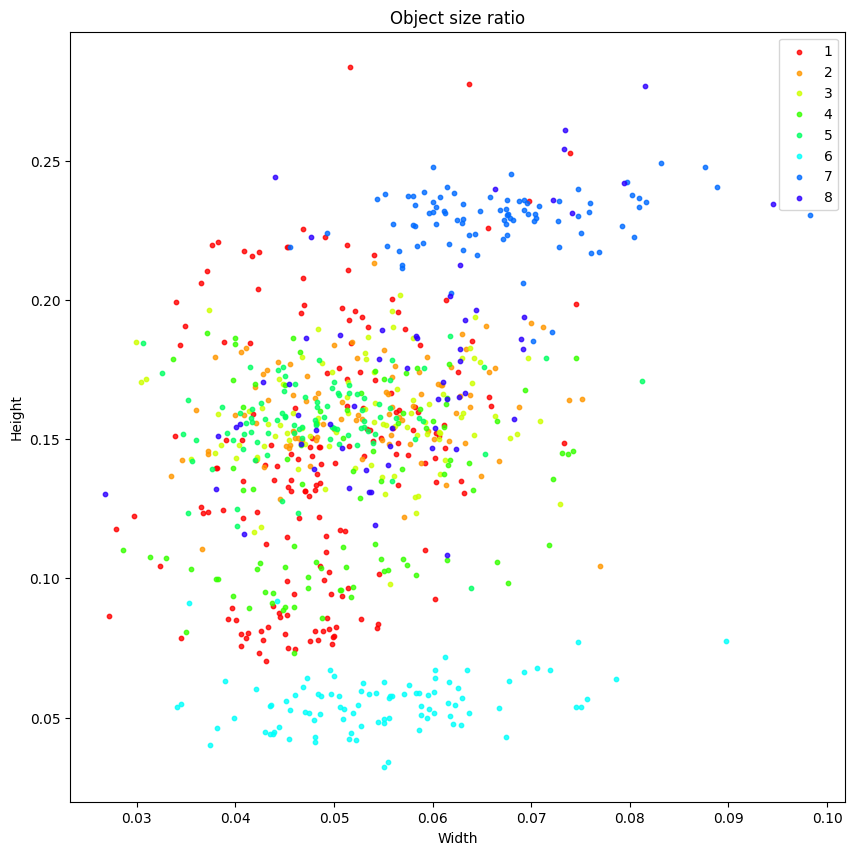

In [39]:
plt.figure(figsize=(10,10))
for i, k in enumerate(list_ws):
    # print(i)
    ws = np.array(list_ws[k])
    hs = np.array(list_hs[k])
    plt.scatter(hs, ws, color=cmap(i*10), s=10, alpha=0.8, label = i+1);
    plt.legend()
plt.title('Object size ratio')
plt.xlabel('Width')
plt.ylabel('Height')

In [13]:
from utils import four_point_transform

In [33]:
vis_max_image = 20
list_crops = []
for i,image_path in enumerate(image_paths[:vis_max_image]):
    print(image_path)
    img = cv2.imread(image_paths[i])
    bboxes, labels = read_labelme_value(label_paths[i])
    labels, bboxes = zip(*sorted(zip(labels, bboxes)))
    crops = []
    for bbox in bboxes:
        crop = four_point_transform(img, bbox)
        crops.append(crop)
    list_crops.append(crops)

/media/huyvt/DATA/adtech/OCR/visa/dataset/visa_v2/train/images_Object/bad_008.jpg
/media/huyvt/DATA/adtech/OCR/visa/dataset/visa_v2/train/images_Object/bad_010.jpg
/media/huyvt/DATA/adtech/OCR/visa/dataset/visa_v2/train/images_Object/bad_012.jpg
/media/huyvt/DATA/adtech/OCR/visa/dataset/visa_v2/train/images_Object/bad_013.jpg
/media/huyvt/DATA/adtech/OCR/visa/dataset/visa_v2/train/images_Object/bad_014.jpg
/media/huyvt/DATA/adtech/OCR/visa/dataset/visa_v2/train/images_Object/bad_017.jpg
/media/huyvt/DATA/adtech/OCR/visa/dataset/visa_v2/train/images_Object/bad_018.jpg
/media/huyvt/DATA/adtech/OCR/visa/dataset/visa_v2/train/images_Object/bad_020.jpg
/media/huyvt/DATA/adtech/OCR/visa/dataset/visa_v2/train/images_Object/bad_021.jpg
/media/huyvt/DATA/adtech/OCR/visa/dataset/visa_v2/train/images_Object/bad_022.jpg
/media/huyvt/DATA/adtech/OCR/visa/dataset/visa_v2/train/images_Object/bad_023.jpg
/media/huyvt/DATA/adtech/OCR/visa/dataset/visa_v2/train/images_Object/bad_025.jpg
/media/huyvt/DAT

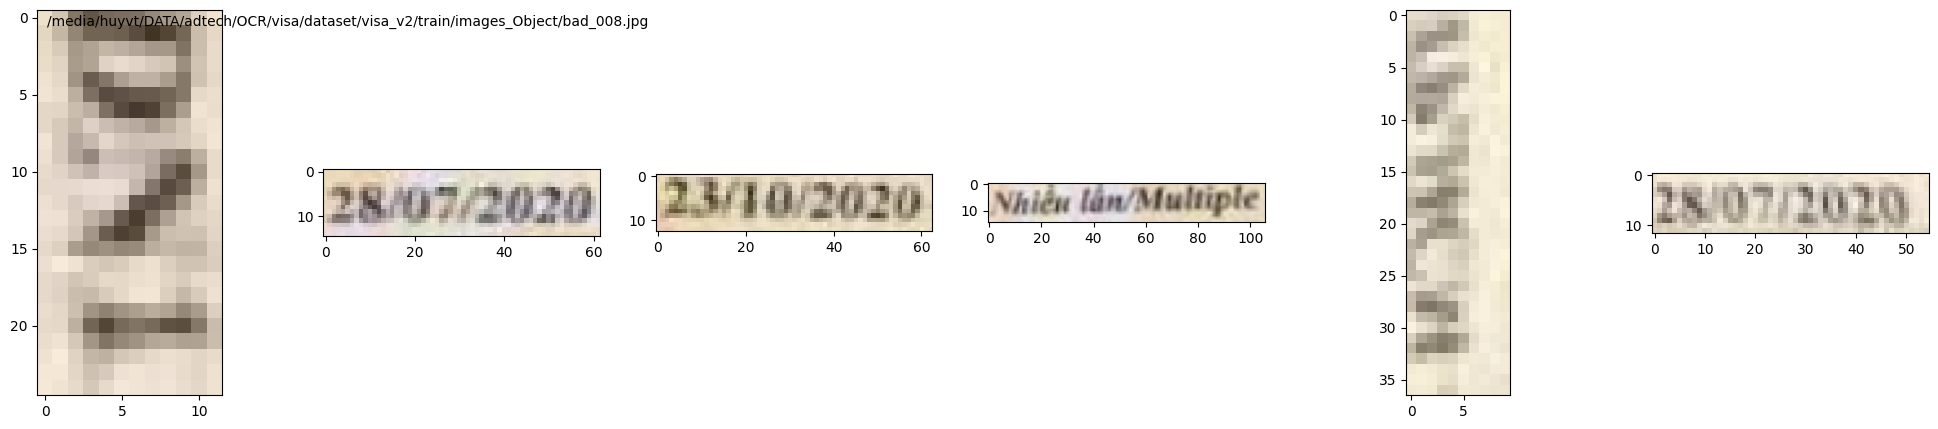

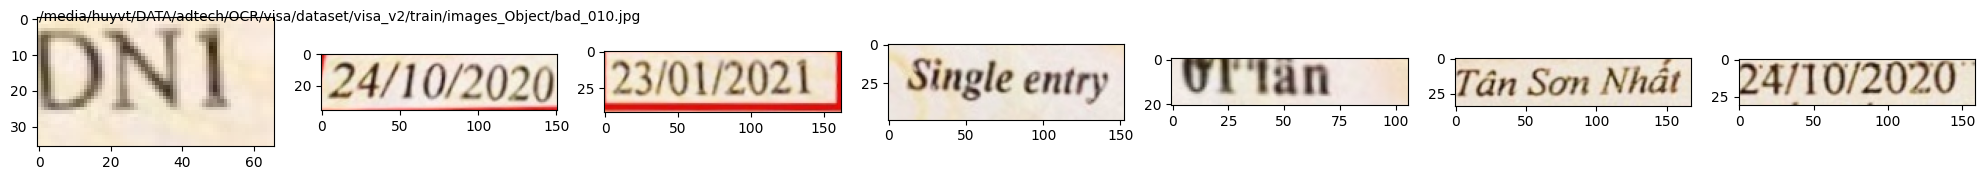

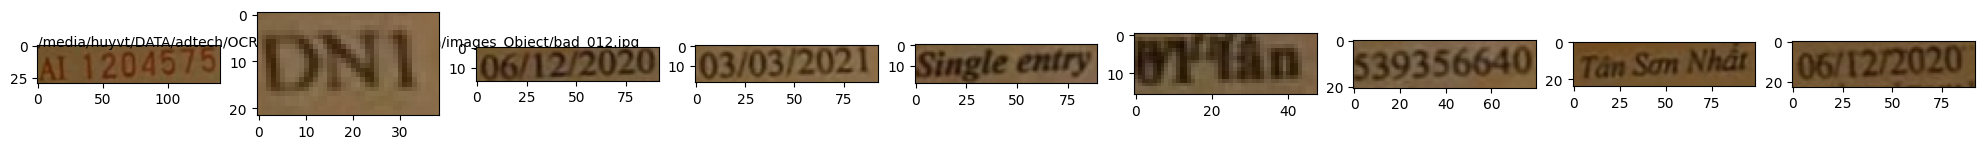

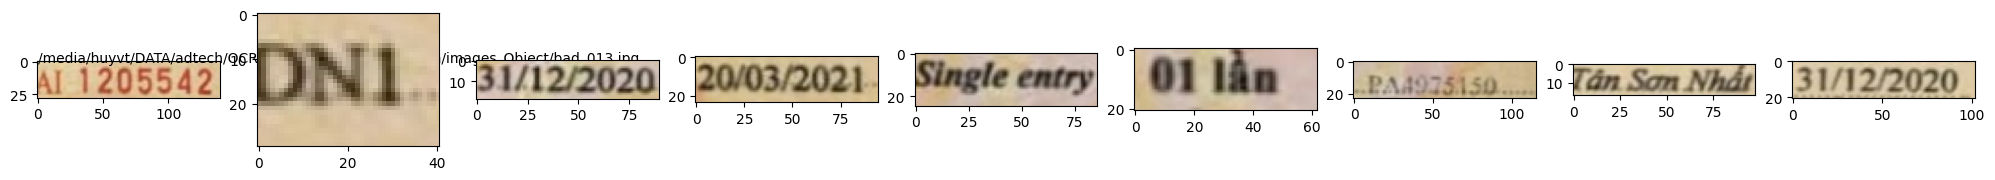

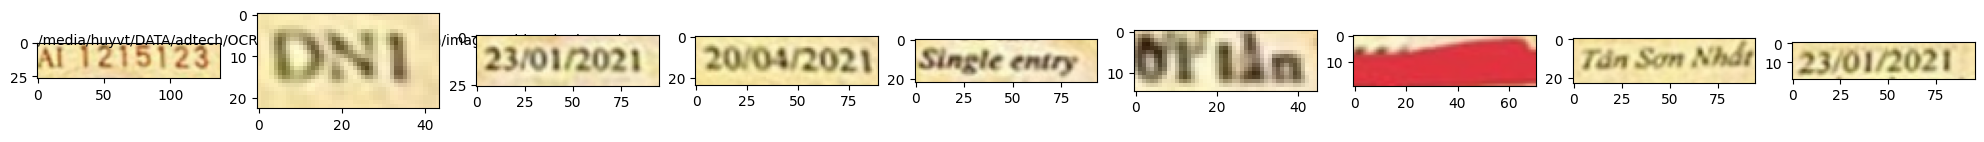

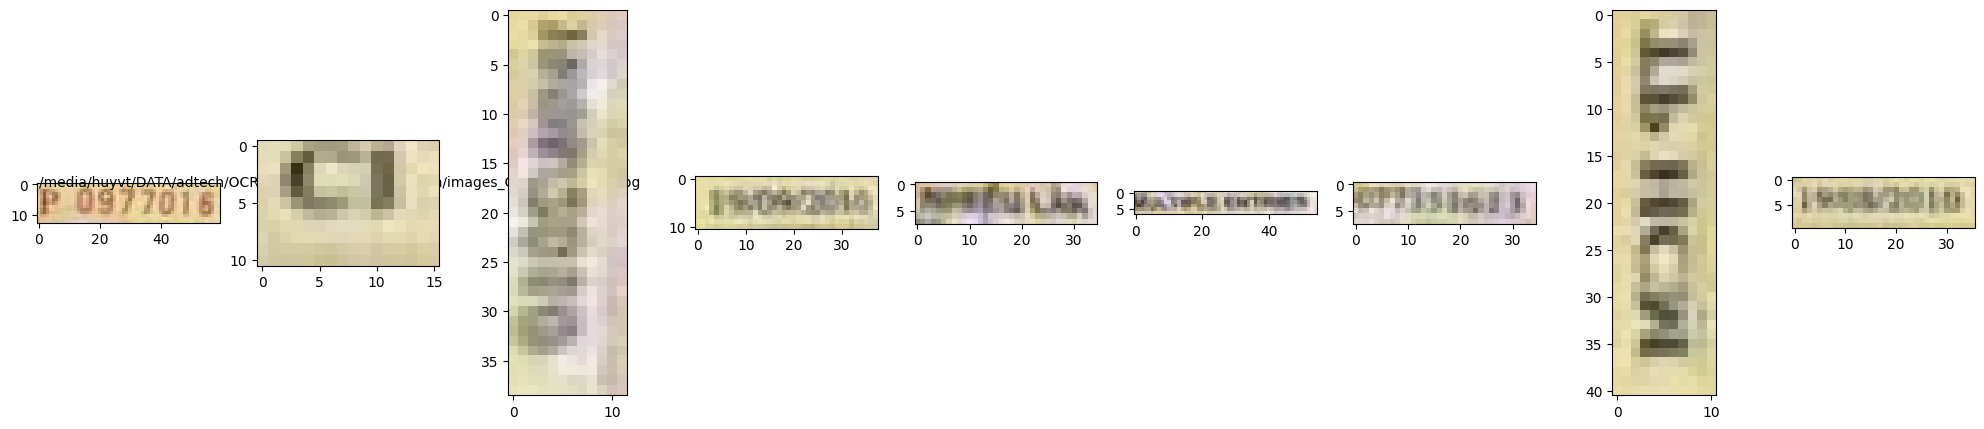

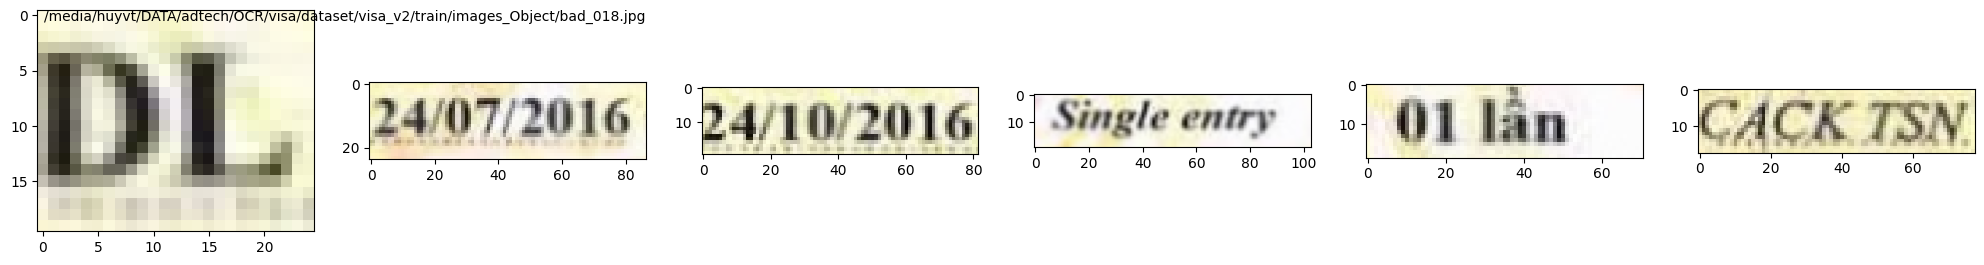

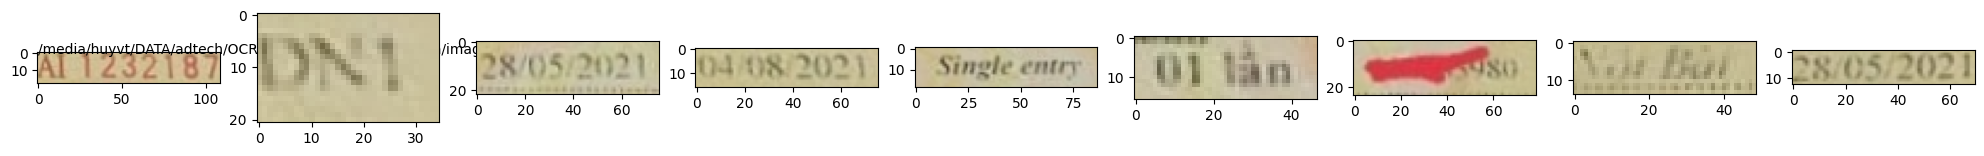

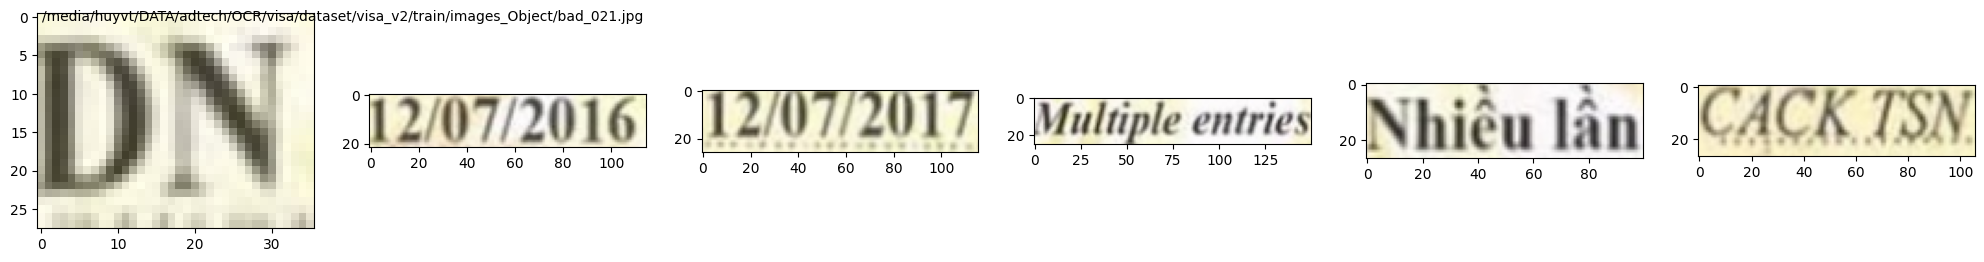

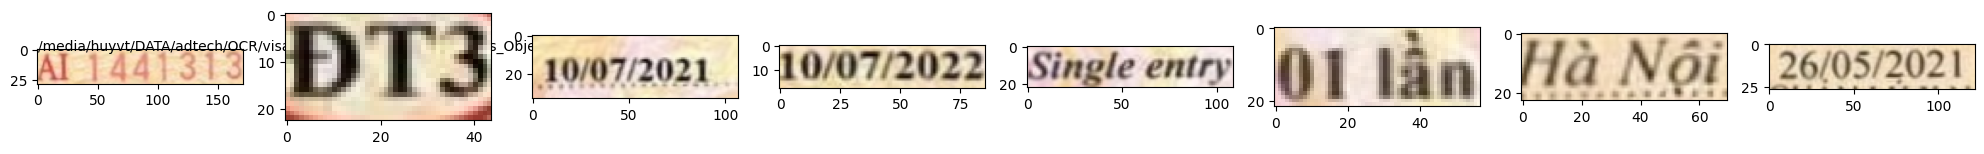

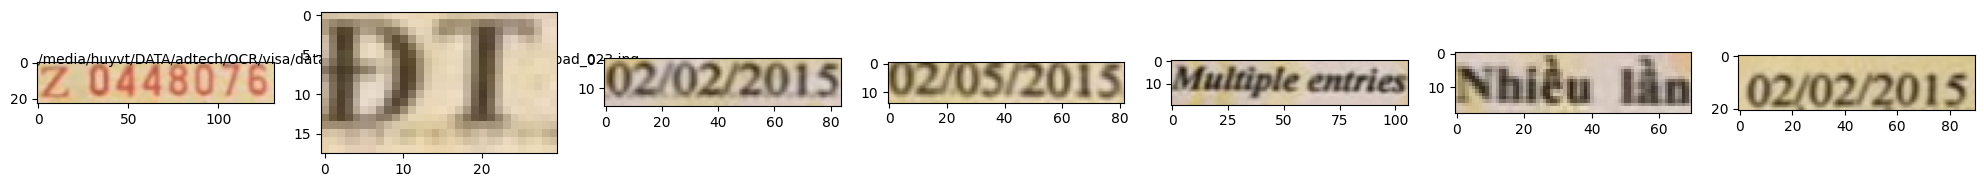

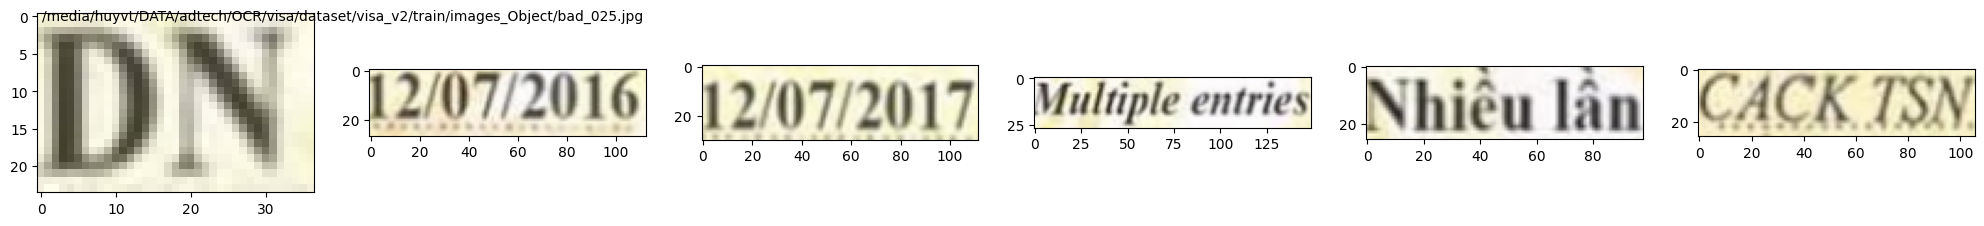

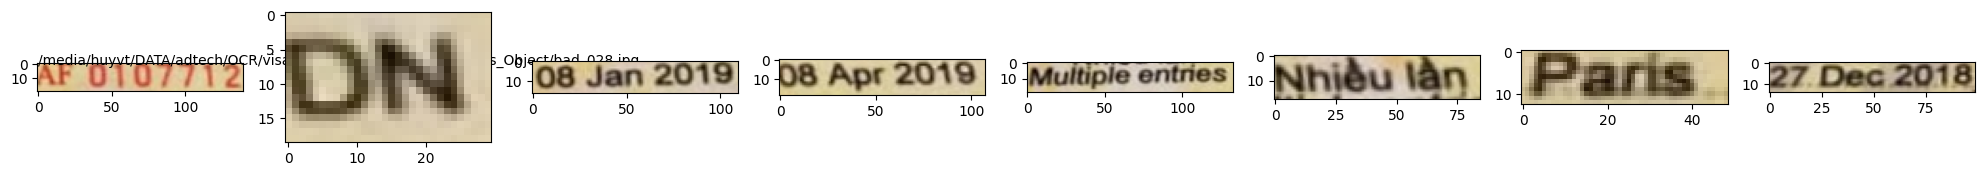

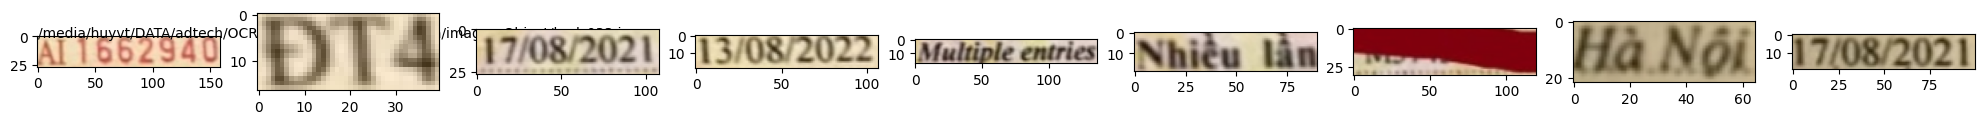

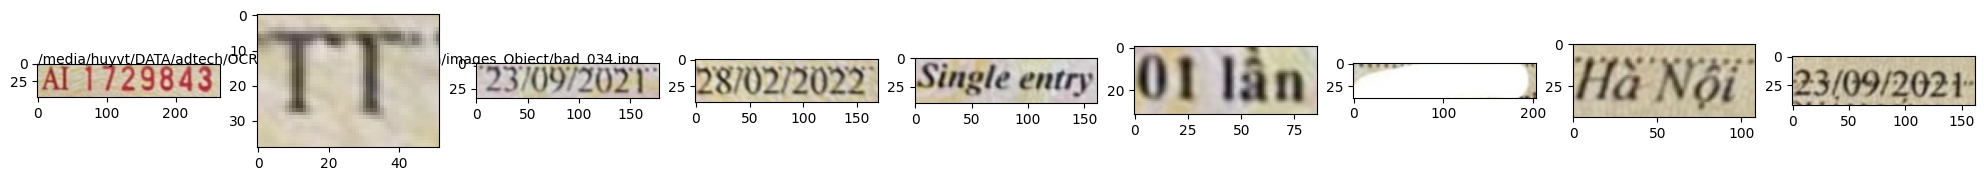

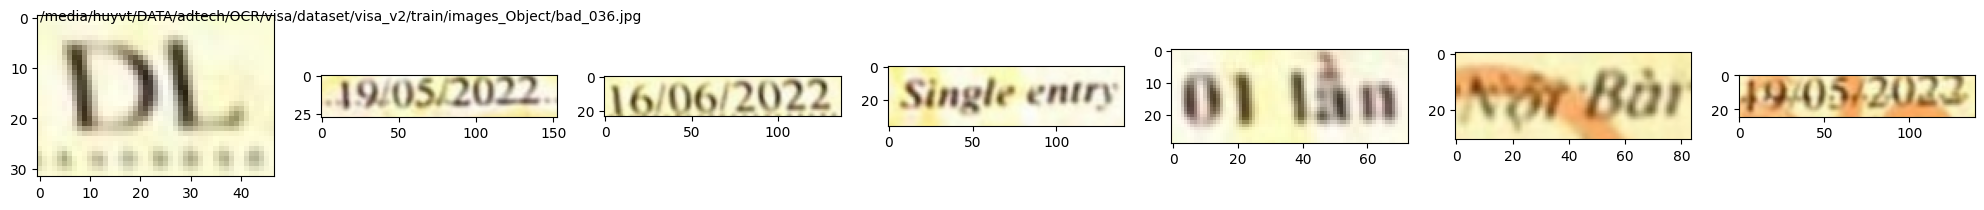

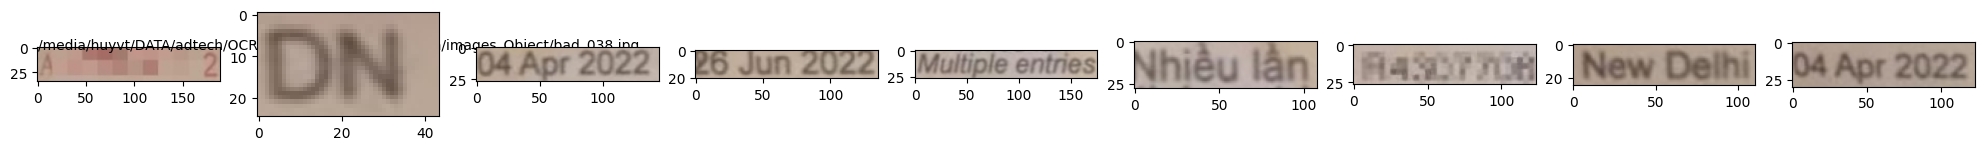

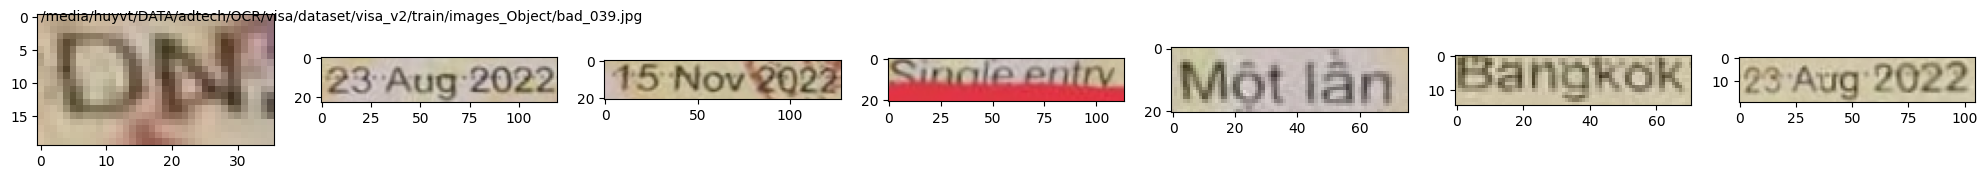

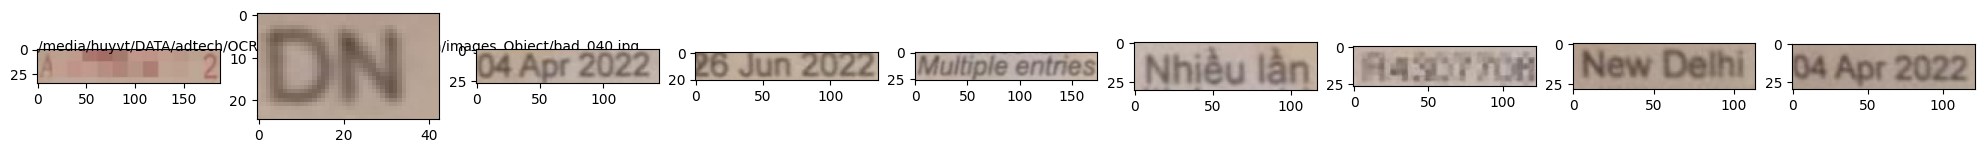

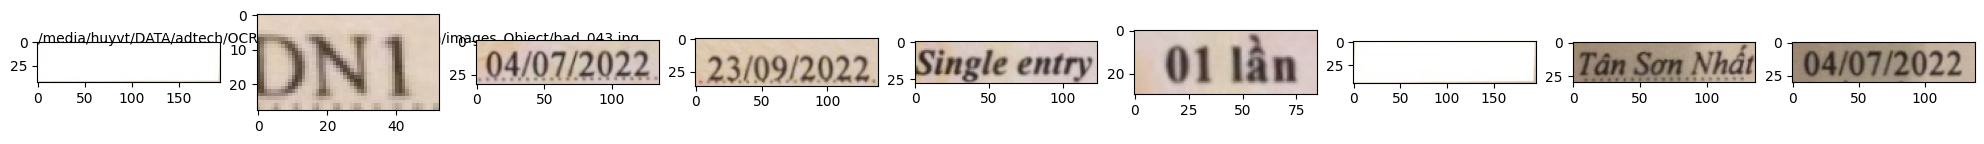

In [34]:
for idx, crops in enumerate(list_crops):
    # print('*')
    plt.figure(figsize=[25, 5])
    n_cars = len(crops)
    plt.subplot(1, n_cars, 1)
    plt.text(0.1, 0.5, image_paths[idx])
    for i, img in enumerate(crops):
        # print(img.shape)
        plt.subplot(1, n_cars, i+1)
        plt.imshow(img[:,:,::-1])
    
plt.show()